## The first steps

### Project Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Reading the .csv file

In [6]:
# Opening the file
df = pd.read_csv("data/PLTR_HistoricalData.csv")

# Reading the first 5 rows
df.head()

,Date,PX_OPEN,ChangeO,% ChangeO,PX_LAST,ChangeL,% ChangeL,PX_LOW,PX_HIGH,PX_MID,...,BEst_EPS,PX_TO_BOOK_RATIO,EBIT,ROE,ROA,EARN_YLD_HIST,PUT_CALL_VOLUME_RATIO_CUR_DAY,SHORT_INT_RATIO,BETA_ADJ_OVERRIDABLE,BETA_RAW_OVERRIDABLE
0,2/28/25,79.98,-11.93,-12.980089,84.92,0.15,0.176949,78.58,85.18,84.915,...,NaN,39.6961,11.043,10.9022,8.5092,0.2313,0.7442,NaN,2.0358,2.5537
1,2/27/25,91.91,2.75,3.084343,84.77,-4.54,-5.083417,84.17,93.62,84.770,...,NaN,39.6260,113.140,12.3976,8.5092,0.2317,0.8231,NaN,2.0508,2.5763
2,2/26/25,89.16,-1.49,-1.643685,89.31,1.47,1.673497,87.59,91.69,89.330,...,NaN,41.7482,113.140,12.3976,8.5092,0.2199,0.6235,NaN,2.0460,2.5690
3,2/25/25,90.65,-5.23,-5.454735,87.84,-2.84,-3.131892,85.25,91.70,87.845,...,NaN,41.0611,113.140,12.3976,8.5092,0.2236,0.9176,NaN,2.0462,2.5693
4,2/24/25,95.88,-11.80,-10.958395,90.68,-10.67,-10.527874,89.30,99.01,90.665,...,NaN,42.3886,113.140,12.3976,8.5092,0.2166,1.1069,NaN,2.0426,2.5639


### Converting the date and sorting from oldest to newest

In [8]:
df['Date'] = pd.to_datetime(df['Date']) #conversion to date format
df = df.sort_values('Date') #sorting of date
df = df.reset_index(drop=True) #resetting the index (for appearance)

df.head()

/var/folders/qr/x5t14c092n92c7lr8pv2b3cw0000gn/T/ipykernel_7306/4215779417.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date']) #conversion to date format


,Date,PX_OPEN,ChangeO,% ChangeO,PX_LAST,ChangeL,% ChangeL,PX_LOW,PX_HIGH,PX_MID,...,BEst_EPS,PX_TO_BOOK_RATIO,EBIT,ROE,ROA,EARN_YLD_HIST,PUT_CALL_VOLUME_RATIO_CUR_DAY,SHORT_INT_RATIO,BETA_ADJ_OVERRIDABLE,BETA_RAW_OVERRIDABLE
0,2020-09-30,10.00,NaN,NaN,9.50,NaN,NaN,9.11,11.42,9.505,...,NaN,13.1044,-99.145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-10-01,9.69,NaN,NaN,9.46,NaN,NaN,9.23,10.10,9.445,...,NaN,13.0493,-99.145,NaN,NaN,NaN,NaN,NaN,71.1589,106.2394
2,2020-10-02,9.06,NaN,NaN,9.20,NaN,NaN,8.94,9.28,9.185,...,NaN,12.6906,-99.145,NaN,NaN,NaN,NaN,NaN,9.2217,13.3327
3,2020-10-05,9.43,NaN,NaN,9.03,NaN,NaN,8.92,9.49,9.035,...,NaN,12.4561,-99.145,NaN,NaN,NaN,NaN,NaN,2.1133,2.6699
4,2020-10-06,9.04,NaN,NaN,9.90,NaN,NaN,8.90,10.18,9.905,...,NaN,13.6562,-99.145,NaN,NaN,NaN,0.1673,NaN,0.8663,0.7994


## Missing Values

### Checking what is there

<Axes: >

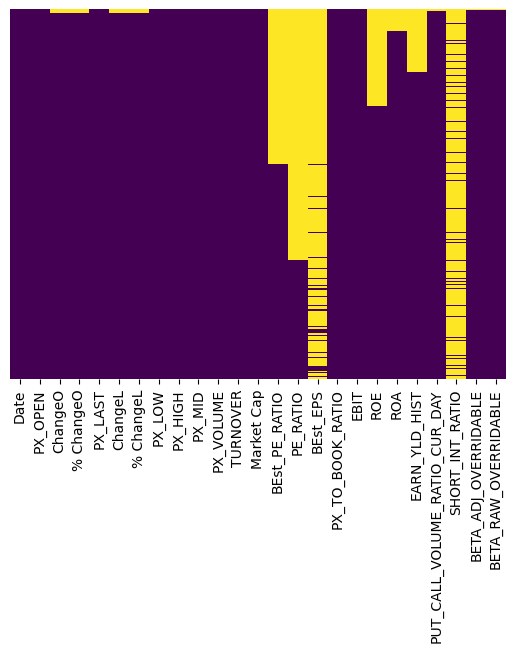

In [11]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #graph to see the missing values

### Removing columns with mostly missing values:

In [13]:
df = df.drop(['BEst_EPS', 'SHORT_INT_RATIO'], axis=1) 

In [14]:
df = df.dropna(how='all') #removing rows with no information

### Checking the data again

<Axes: >

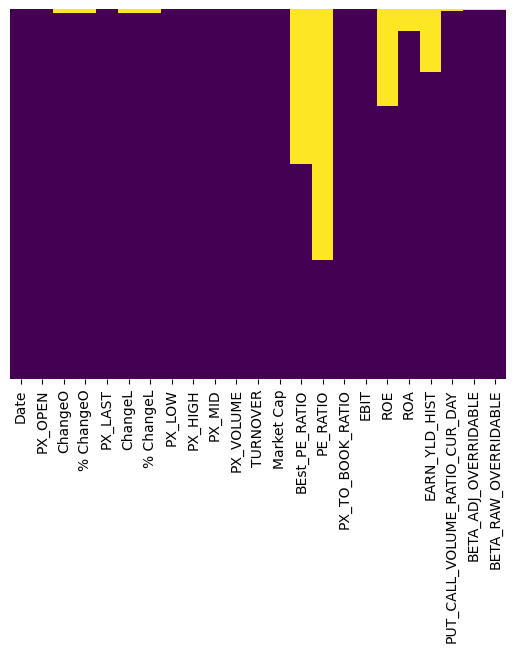

In [16]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #graph to see the missing values

### More data selection decisions

Currently I have to decide if I want to drop rows or columns, depending on how useful some ratios are. For now I'm removing the P/E ratios (both the Bloomberg Expected and the regular one).

In [19]:
df = df.drop(['BEst_PE_RATIO', 'PE_RATIO'], axis=1) 

I'll try to use P/B instead of P/E to understand how investors are feeling, due to the fact it has more data.

Since data regarding ROE, ROA and Earnings Yield is missing near the start of the stock, I will remove those rows, and work with the rest.

In [22]:
df = df.dropna() #removes all rows with ANY missing data

Checking again...

<Axes: >

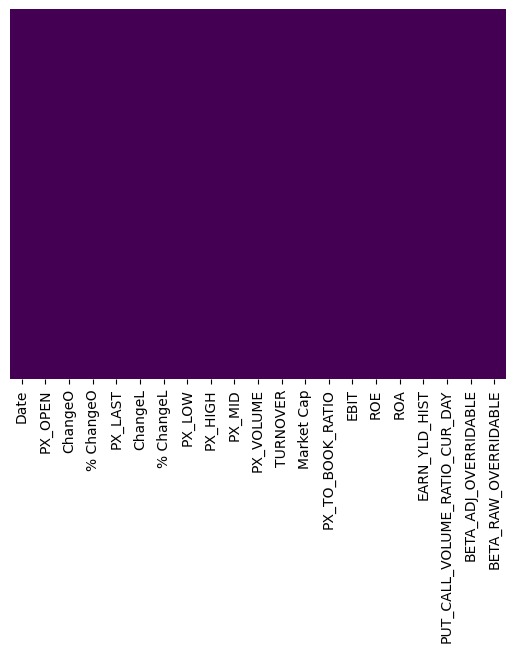

In [24]:
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis') #graph to see the missing values

## Feature Engineering

### Creation of new features

In [27]:
# Creating a Daily Range column
df['Daily_Range'] = df['PX_HIGH'] - df['PX_LOW']

In [28]:
# Creating 10Day & 20Day moving averages for the closing price, the daily range and the volume.
df['10D_Moving_Avg_Close'] = df['PX_LAST'].rolling(window=10).mean()
df['20D_Moving_Avg_Close'] = df['PX_LAST'].rolling(window=20).mean()

df['10D_Moving_Avg_Daily_Range'] = df['Daily_Range'].rolling(window=10).mean()
df['20D_Moving_Avg_Daily_Range'] = df['Daily_Range'].rolling(window=20).mean()

df['10D_Moving_Avg_Volume'] = df['PX_VOLUME'].rolling(window=10).mean()
df['20D_Moving_Avg_Volume'] = df['PX_VOLUME'].rolling(window=20).mean()

### Figuring out the correlation of various elements with the % change in the stock's price

Since I calculated the daily range and I already have %ChangeL (the change in price at the end of the day), I will remove various categories which aren't needed for the model

In [31]:
df = df.drop(['ChangeL', '% ChangeO', 'ChangeO', 'Date'], axis=1)

df = df.dropna() # Drop rows with NaN values created by rolling calculations

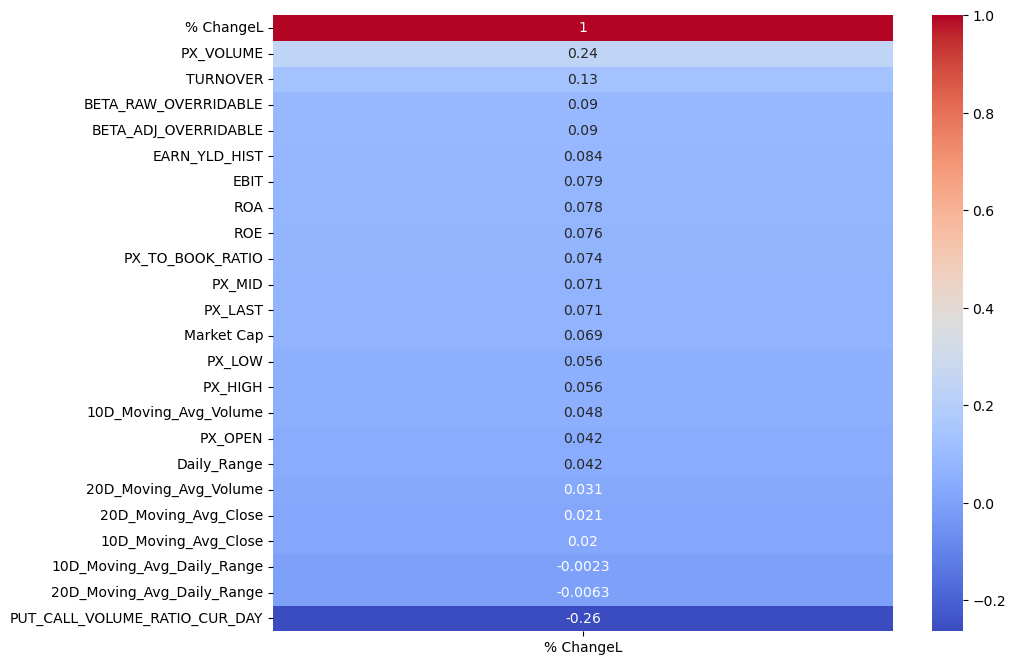

In [32]:
corr_matrix = df.corr()

# Create a heatmap of correlation with %Change
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix[['% ChangeL']].sort_values(by='% ChangeL', ascending=False), annot=True, cmap='coolwarm')
plt.show()

In [33]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Excluding '% ChangeL' column from the dataset
X = df.drop(columns=['% ChangeL'])  
y = df['% ChangeL']  # The target

# Filter features based on correlation threshold
corr_matrix = df.corr()
low_corr_threshold = 0.04  # Threshold for correlation
high_corr_features = corr_matrix.index[(abs(corr_matrix['% ChangeL']) >= low_corr_threshold)]
low_corr_features = corr_matrix.index[(abs(corr_matrix['% ChangeL']) < low_corr_threshold)]

# Separate high and low correlation features
X_high_corr = df[high_corr_features].drop(columns=['% ChangeL'])  # Keep only high-correlation features
X_low_corr = df[low_corr_features]  # Low-correlation features

# Apply PCA to the low-correlation features
scaler = StandardScaler()  # Standardize the low-correlation features for PCA
X_low_corr_scaled = scaler.fit_transform(X_low_corr)

# Perform PCA keeping 95% of the variance
pca = PCA(n_components=0.95)
X_low_corr_pca = pca.fit_transform(X_low_corr_scaled)

# Combine high-correlation features with PCA components
X_combined = np.hstack((X_high_corr, X_low_corr_pca))

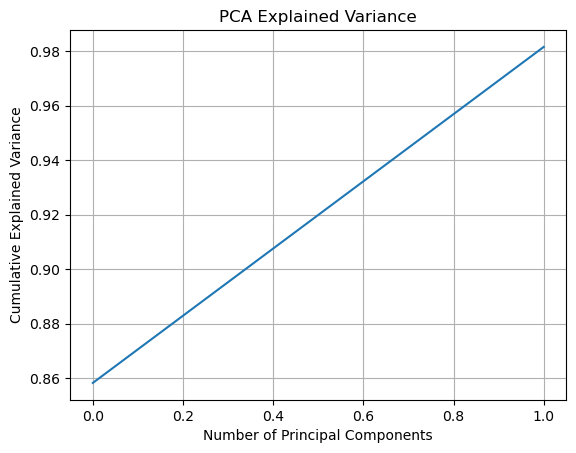

In [34]:
#Plotting the PCA graph
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid(True)
plt.show()

## Regression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)